# Individual Assignment: Machine Learning and Neural Networks

**Introduction:**<br>This Notebook will explain how to train and built a Denoising Autoencoder DAE by using the Fashion MNIST dataset.<br>The model will learn how to rebuilt clean images from corrupted inputs.<br> We will use the standard DAE approach introduced by Vincent et al. (2008), where during training the model, Gaussian noice is added.

**Git-Hub Repository Link**

https://github.com/irzamlatif/denoising-autoencoder-tutorial.git

**Imports which we are going to use in this project**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Imports Done")

Imports Done


**Loading and Preparing Fashion MNIST data**

In [ ]:
# here we will split the testing and training data
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

# Normalise to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension for Conv2D layers
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


**Adding Gassian Noise to the images**:<br>Denoising Autoencoder will take noisy inputs but aim to rebuilt the clean and orignal.

In [ ]:
def add_noise(images, noise_factor=0.5):
    noisy = images + noise_factor * np.random.randn(*images.shape)
    return np.clip(noisy, 0., 1.)

noise_factor = 0.5
x_train_noisy = add_noise(x_train, noise_factor)
x_test_noisy  = add_noise(x_test, noise_factor)

**Visulising orignal vs noisy images**<br> This step will help us to confirm our noise creation step works correctly.

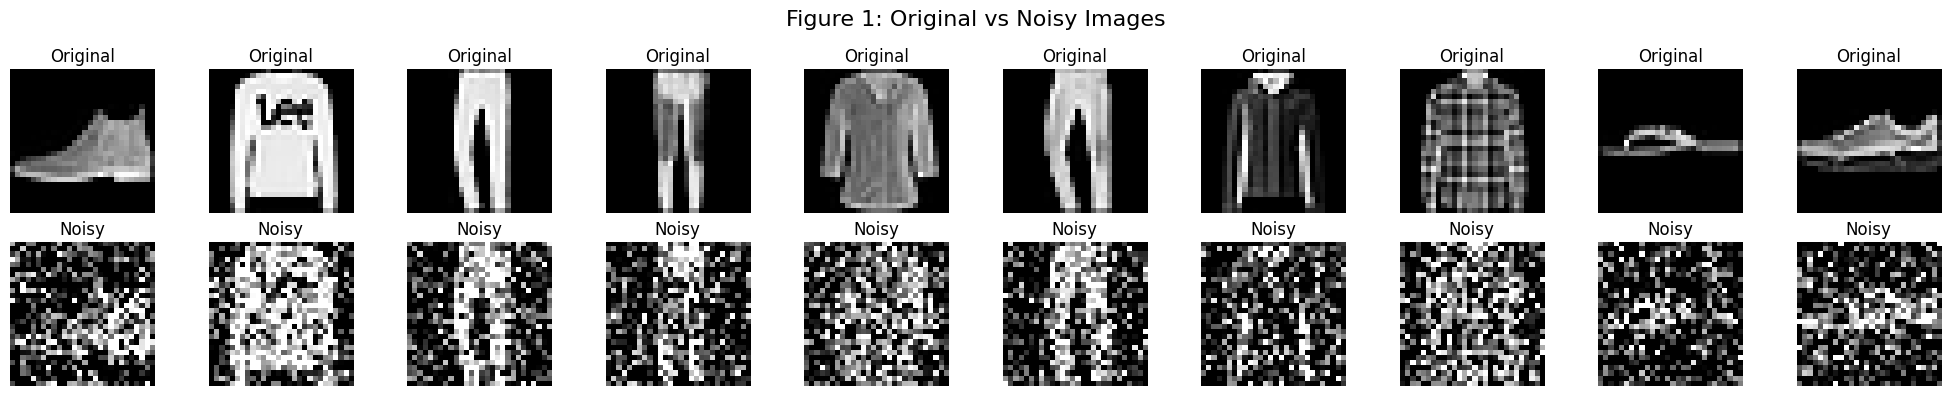

In [ ]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(x_test_noisy[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

plt.suptitle("Figure 1: Original vs Noisy Images", fontsize=16)
plt.tight_layout()
plt.show()

**Build the Convolutional Denoising Autoencoder**<br>

This model consist of:
*   Encoder: Conv2D + MaxPooling
*   Decoder: Conv2D + UpSampling
*   Output layer with sigmoid to reconstruct pixel values

In [ ]:
input_img = keras.Input(shape=(28,28,1))

# Encoder
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2,2), padding="same")(x)

# Decoder
x = layers.Conv2D(64, (3,3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the model**

Because the task is pixel level reconstruction so for the loss function we use MSE(Mean Square Error)

In [ ]:
autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

**Training the Autoencoder**

The model will recieve the noisy images as the inputs but will be trained to produce the clean images as output.<br>
The batch size we are using to train this model is 128 and we are training 20 epochs.

In [ ]:
history = autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 418ms/step - loss: 0.0430 - val_loss: 0.0205
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 404ms/step - loss: 0.0197 - val_loss: 0.0187
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 409ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 409ms/step - loss: 0.0171 - val_loss: 0.0167
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 410ms/step - loss: 0.0164 - val_loss: 0.0163
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 405ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 403ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 402ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - loss: 0.0151 - val_loss: 0.0151
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 188s 400ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 407ms/step - loss: 0.0148 - val_loss: 0.0148
Epoch 12

**Training vs Validation Loss Plots**

This plot will show, how well the model is trained.

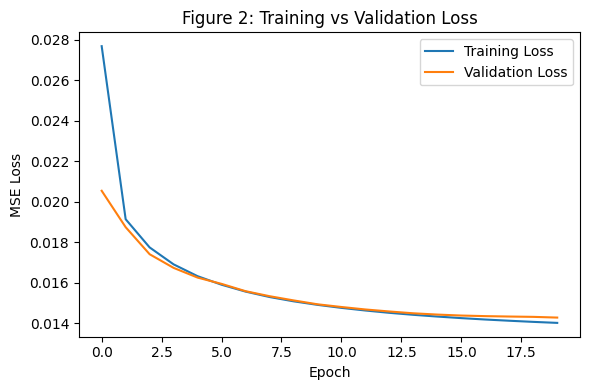

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Figure 2: Training vs Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Visualising the reconstruction** (comparison)

We compare:

noisy → reconstructed → original

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


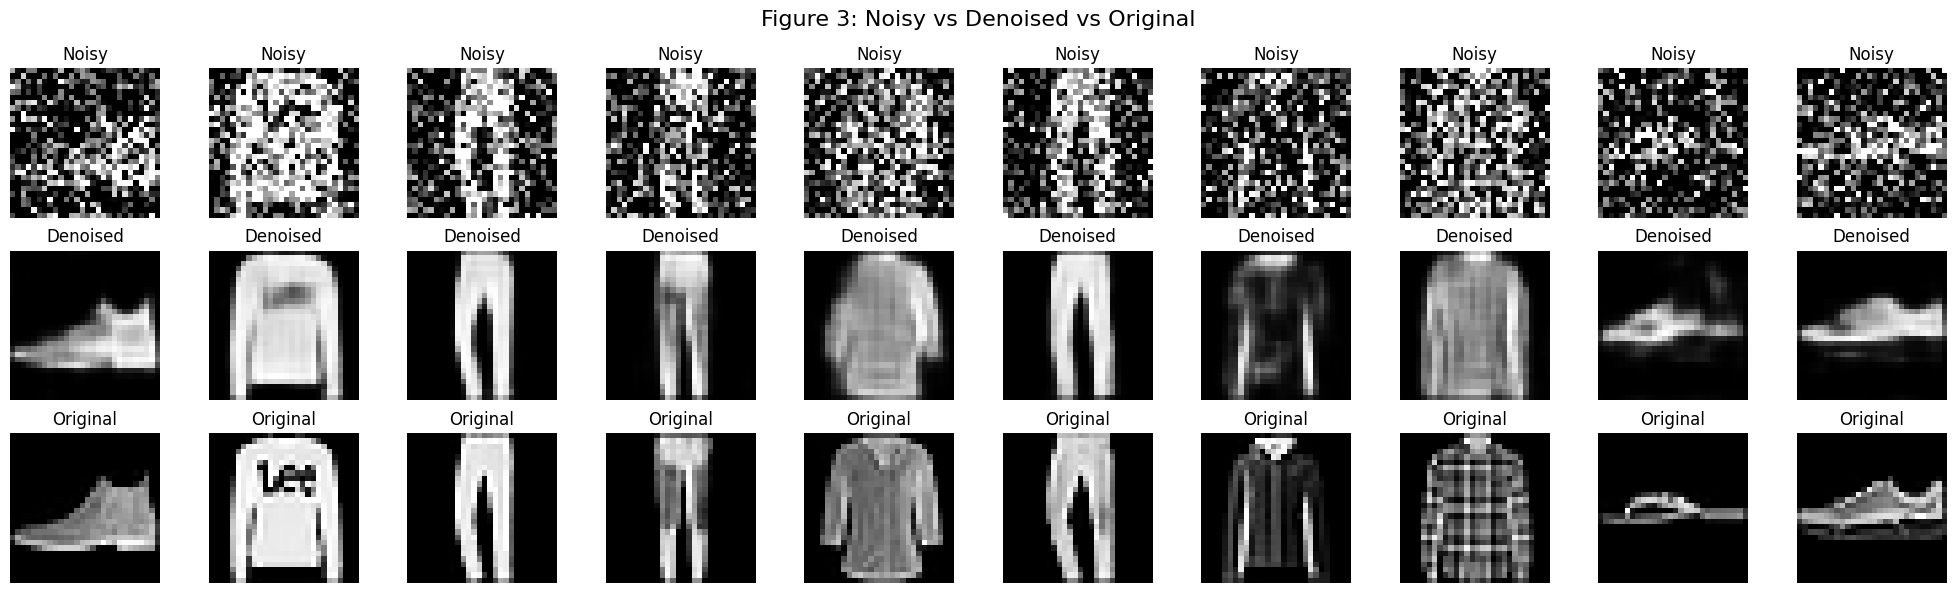

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_noisy[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

plt.suptitle("Figure 3: Noisy vs Denoised vs Original", fontsize=16)
plt.tight_layout()
plt.show()

**Reconstruction Error Histogram plot**

This plot will show how well the model perform accross the whole dataset

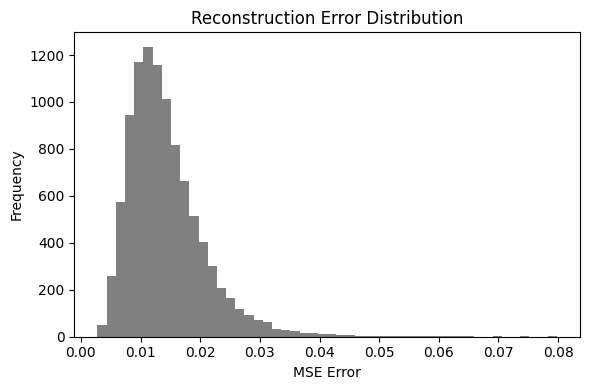

In [ ]:
errors = np.mean((x_test - decoded_imgs) ** 2, axis=(1,2,3))

plt.figure(figsize=(6,4))
plt.hist(errors, bins=50, color="gray")
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Worst Case Recontruction Plot**

This plot will show on which image's the model didn't properly worked on.

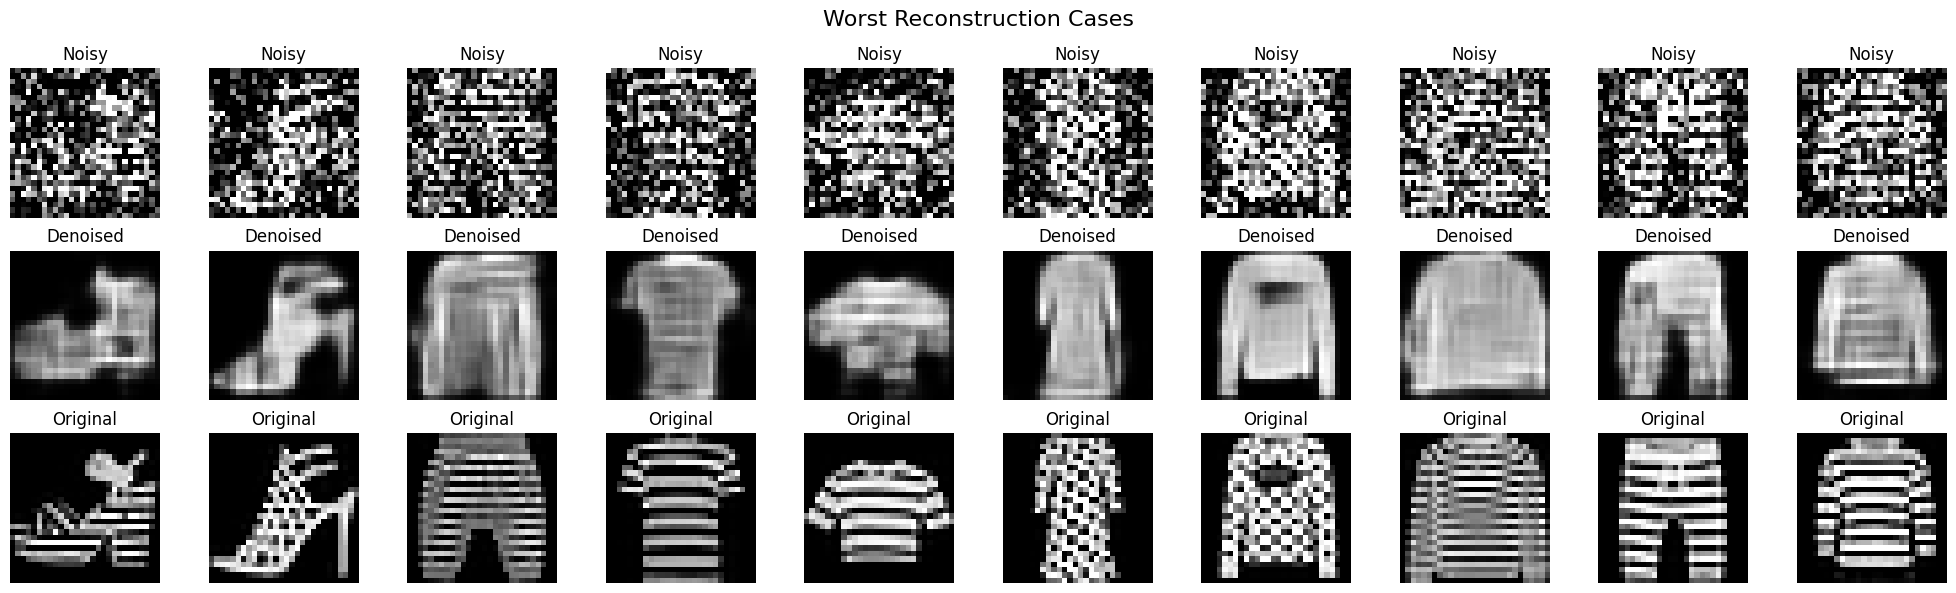

In [ ]:
worst_idx = np.argsort(errors)[-10:]

plt.figure(figsize=(20,6))
for i, idx in enumerate(worst_idx):
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(x_test_noisy[idx].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(3, 10, i+1+10)
    plt.imshow(decoded_imgs[idx].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    ax = plt.subplot(3, 10, i+1+20)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

plt.suptitle("Worst Reconstruction Cases", fontsize=16)
plt.tight_layout()
plt.show()